In [2]:
from datetime import datetime

import datetime as dt
from datetime import date, timedelta
 
import math as m
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import csv


# Definir funcions que calculin totes les parts i combinar amb superfunció

# Apuntar formules i explicacions de l'article Nigèria

$$
C_t=\frac{S_\downarrow}{S_0}
$$
where $S_\downarrow$ is the measured global solar radiation and $S_0$ is the daily extra-terrestrial solar radiation at the top of the atmosphere calculated using the following mathematical expression (Iqbal, 1983; Duffie and Beckham, 2006):
$$
\begin{aligned}
S_0= & \frac{24 \times 3600}{\pi} \times G_0 \times E_0 \times \\
& \left(\sin \omega_s \cos \phi \cos \delta+\frac{\pi \omega_s}{180} \sin \phi \sin \delta\right)
\end{aligned}
$$
where $G_0$ is the solar constant $=1367 \mathrm{Wm}^{-2}, E_0$ is the eccentricity correction factor of the Earth's orbit, $\phi$ is the latitude (positive north), $\omega_s$, is the sunrise hour angle, $\delta$ is the solar declination angle and $\pi=3.142$. The units of $\phi$, and $\delta$ are degrees.

The solar declination angle was determined using the equation developed by Cooper (1969):
$$
\delta=\phi_L \sin \left[\frac{2 \pi\left(d_n-d_r\right)}{d_y}\right]
$$
where $\phi_L$ is the latitude of the Tropic of Cancer $\left(23.45^{\circ} \mathrm{N}\right), d_n$ is the Julian day number of the year (DOY), which ranges from 1 on 1 January to 365 on 31 December, $d_r=284$, and $d_y$ is the average number of days per year with a value of 365 .

The eccentricity correction factor was calculated using Spencer (1971) and Iqbal ( 1983 ):
$E_0=1.000110+0.034221 \cos \Gamma+$
$0.001280 \sin \Gamma+0.000719 \cos 2 \Gamma+$
$0.000077 \sin 2 \Gamma$
where $\Gamma$ (unit in radians) is the day angle and can be expressed as:
$$
\Gamma=\frac{2 \pi\left(d_n-1\right)}{365}
$$
The sunrise hour angle was evaluated using:
$$
\omega_s=\cos ^{-1}(-\tan \phi \tan \delta)
$$
The day length hour was estimated using:
$$
N_0=\frac{2}{15} \cos ^{-1}(-\tan \phi \tan \delta)
$$
The daily values of the cloudiness index for the study site were calculated using $(8)$ when $\omega_s>81.4^{\circ}$ and $0.3 \leq C_{t A V G} \leq 0.8$ (Duffie and Beckham, 2006):
$$
\begin{array}{l}
C_d=\frac{S_d}{S_\downarrow}=1.311-3.022 C_{\text {tAVG }}+ \\
3.427 C_{tAVG}{ }^2-1.821 C_{tAVG} \\
\end{array}
$$


# Falta correcció en la formula 

#IS it calculated per day isn't it?
# ÉS a dir un valor diari sumam tota la irradiació i feim la fracció
#24*3600
#S/S0


#UNITATS DE PHI I GAMMA EN GRAUS??? EL PROBLEMA HA DE SER AMB SOLAR DECLINATION ANGLE O SUNRISE HOUR ANGLE

#S0 hauria de ser un numpy array

day = np.arange(1,366,1)
lat_rad = m.radians(42 + 49.44/60)

def clearness_index0(lat_rad,day):  
    #day hauria de ser un array de dimensió num-dies (365)
    #lat_rad en radians
    #lat_cancer en radians
    
    G0 = 1367 # Wm-2
    lat_cancer = m.radians(23+45/60)
    lat = lat_rad
    
    
    
    
    
    sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day - 284)/365)
    #sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day - 284)/365)  # *23.45
    sunrise_hour_angle = np.arccos(-np.tan(lat)*np.tan(sol_decl_angle))
    gamma = 2*np.pi*(day-1)/365
    E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) + 0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)
    #E0 = 1 + 0.033*np.cos(2*np.pi*day/365)

    
    S0 = 86400*G0*E0*(np.sin(sunrise_hour_angle)*np.cos(lat)*np.cos(sol_decl_angle) 
                       + np.pi*sunrise_hour_angle*np.sin(lat)*np.sin(sol_decl_angle)/180)/np.pi
    
    return S0
    

In [148]:
#IS it calculated per day isn't it?
# ÉS a dir un valor diari sumam tota la irradiació i feim la fracció
#24*3600
#S/S0


#UNITATS DE PHI I GAMMA EN GRAUS??? EL PROBLEMA HA DE SER AMB SOLAR DECLINATION ANGLE O SUNRISE HOUR ANGLE

#S0 hauria de ser un numpy array

day = np.arange(1,366,1)
lat_rad = m.radians(42 + 49.44/60)

def clearness_index0(lat_rad,day):  
    #day hauria de ser un array de dimensió num-dies (365)
    #lat_rad en radians
    #lat_cancer en radians
    
    G0 = 1367 # Wm-2
    lat_cancer = m.radians(23+45/60)
    lat = lat_rad
    
    
    
    
    gamma = 2*np.pi*(day-1)/365
    E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) + 0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)
    #E0 = 1 + 0.033*np.cos(2*np.pi*day/365)
    sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day + 284)/365)
    #sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day - 284)/365)  # *23.45
    sunrise_hour_angle = np.arccos(-np.tan(lat)*np.tan(sol_decl_angle))
  
    

    
    S0 = 86400*G0*E0*(np.sin(sunrise_hour_angle)*np.cos(lat)*np.cos(sol_decl_angle) 
                       + sunrise_hour_angle*np.sin(lat)*np.sin(sol_decl_angle))/np.pi
    
    return S0
    

In [149]:
S0 = clearness_index0(lat_rad,day)

In [150]:
S0

array([11891436.57537166, 11946918.63761854, 12006957.77044996,
       12071546.50404772, 12140676.45194368, 12214338.26614127,
       12292521.59047592, 12375215.01246308, 12462406.01388913,
       12554080.92040615, 12650224.85039515, 12750821.66336472,
       12855853.90815287, 12965302.77119913, 13079148.02515203,
       13197367.97807345, 13319939.42349705, 13446837.59159179,
       13578036.1016747 , 13713506.91630959, 13853220.29721855,
       13997144.76322435, 14145247.05043089, 14297492.07483778,
       14453842.89757357, 14614260.69292004, 14778704.71928718,
       14947132.2932859 , 15119498.76703213, 15295757.50880307,
       15475859.88715247, 15659755.25857886, 15847390.95882706,
       16038712.29788975, 16233662.55876308, 16432182.99999715,
       16634212.86206879, 16839689.37759239, 17048547.78537148,
       17260721.34828178, 17476141.37496511, 17694737.24530165,
       17916436.4396175 , 18141164.5715732 , 18368845.42466934,
       18599400.99229483, 18832751.52123

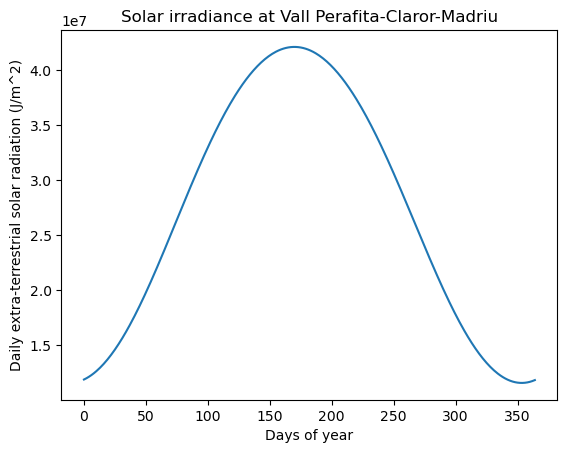

In [151]:
plt.plot(S0)
plt.xlabel('Days of year')
plt.ylabel('Daily extra-terrestrial solar radiation (J/m^2)')
plt.title('Solar irradiance at Vall Perafita-Claror-Madriu')


plt.savefig('extra_terrestial_daily_rad.png')


In [147]:
pd.read_csv('daily.dat')

,Date sza RS Irradiacio
0,yyyy-mm-dd deg W/m2 J/m2
1,-- mitjana mitjana total
2,2009-01-01 72.28 228.33 6438942
3,2009-01-02 72.19 154.27 4350366
4,2009-01-03 72.11 276.84 7806966
...,...
5074,2022-12-27 72.33 254.01 7010736
5075,2022-12-28 72.28 297.32 8206104
5076,2022-12-29 72.50 209.24 5900658
5077,2022-12-30 72.44 202.30 5704836


In [100]:
data = csv.reader(open('daily.dat', 'r'), delimiter=" ", quotechar='|')
column1,column2,column3,column4 = [],[],[],[]

for row in data:
    column1.extend([row[0]])
    column2.extend([row[1]])
    column3.extend([row[2]])
    column4.extend([row[3]])

In [101]:
col1,col2,col3,col4 = column1,column2,column3,column4
del col1[:2],col2[0],col3[:2],col4[:3]

In [102]:
col4

['6438942',
 '4350366',
 '7806966',
 '8053326',
 '8312202',
 '4206684',
 '7296324',
 '6169230',
 '3758496',
 '3693408',
 '8335584',
 '8705766',
 '6956214',
 '8787372',
 '8488260',
 '8499210',
 '7811082',
 '9175872',
 '3952692',
 '5651634',
 '7566936',
 '5402622',
 '5223366',
 '5470086',
 '8661522',
 '9876378',
 '10779678',
 '8824692',
 '10608198',
 '9879312',
 '8993148',
 '4275594',
 '6726252',
 '6227988',
 '13067694',
 '6093516',
 '5856048',
 '10956582',
 '12377148',
 '10779510',
 '10611462',
 '4616718',
 '13443150',
 '8755602',
 '13890090',
 '11963136',
 '12687624',
 '14203878',
 '12975222',
 '14919270',
 '15071364',
 '15374400',
 '8031006',
 '15605136',
 '16157484',
 '16327338',
 '16437990',
 '16252524',
 '10485288',
 '4061778',
 '3613165',
 '3754068',
 '8227158',
 '12605904',
 '17634348',
 '17719704',
 '19018914',
 '19123146',
 '18264522',
 '12895626',
 '19224198',
 '19588278',
 '17399724',
 '20013180',
 '20746764',
 '20538846',
 '20660376',
 '21155658',
 '21763836',
 '21618306',
 

In [103]:
col4 =np.array(col4)
col4 = col4.astype(float)

In [128]:
len(col4)

5077

In [135]:
S0_13 = []
S0_13 = np.array(S0_13)

for i in range(13):
    S0_13 = np.append(S0_13,S0[::])
    
print(len(S0_13))
print(S0_13)


4745
[11891436.57537166 11946918.63761854 12006957.77044996 ...
 11752394.64516662 11794169.21368957 11840518.17975527]


0.5428007918175437
0.18099397024214617


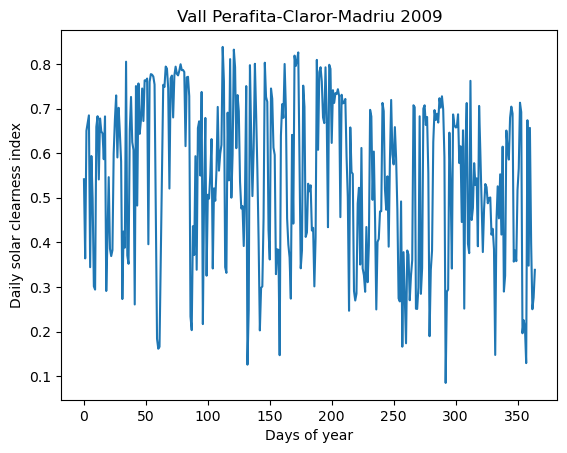

In [156]:
plt.plot(col4[:365]/S0)
plt.xlabel('Days of year')
plt.ylabel('Daily solar clearness index')
plt.title('Vall Perafita-Claror-Madriu 2009')
#plt.savefig('daily_clearness_index_2009')
print((col4[:365]/S0).mean())
print((col4[:365]/S0).std())


Text(0.5, 1.0, 'Vall Perafita-Claror-Madriu 2009-2022')

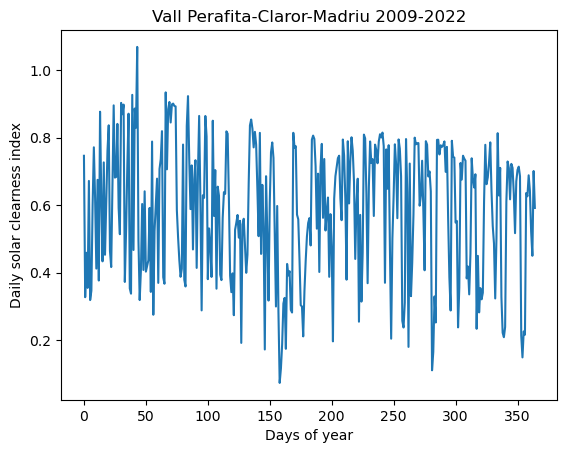

In [142]:
np.where(col4[]/S0 >2)

(array([   0,    1,    2, ..., 5074, 5075, 5076], dtype=int64),)

In [114]:
for i in range(len(col4),365):
    plt.plot(col4[:i]/S0)
    plt.show()
    

In [115]:
# Afegir per tots els anys, promitj i sense

# Agafar i fer array S0[1,2,...,365,1,2,...,365,1,2,...,365,... ...365]

In [ ]:
#Repeat 

In [ ]:
#---------------- Prov de fer per tots els anys

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [141]:
pp = [1,2,3,4,5,6,7]
print(len(pp))
pp[:len(pp)]

7


[1, 2, 3, 4, 5, 6, 7]

In [ ]:
day = np.arange(1,366,1)
lat_rad = m.radians(42 + 49.44/60)

def clearness_index0(lat_rad,day):  
    #day hauria de ser un array de dimensió num-dies (365)
    #lat_rad en radians
    #lat_cancer en radians
    
    G0 = 1367 # Wm-2
    lat_cancer = m.radians(23+45/60)
    lat = lat_rad
    
    #doy....
    #hora...
    
    hangle1 = 15*(hora - 1/6 - 12)*(np.pi/180)
    hangle2 = 15*(hora - 12)*(np.pi/12)
    sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day + 284)/365)
    gamma = 2*np.pi*(day-1)/365
    E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) + 0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)
    
    C = (p.sin(hangle2) - np.sin(hangle1))*cos(lat)*cos(sol_decl_angle) +\
    (pi/72)*sin(lat)*sin(sol_decl_angle)

    S0 = 600*G0*E*C
    
"""   
    #E0 = 1 + 0.033*np.cos(2*np.pi*day/365)
    
    #sol_decl_angle = lat_cancer*np.sin(2*np.pi*(day - 284)/365)  # *23.45
    sunrise_hour_angle = np.arccos(-np.tan(lat)*np.tan(sol_decl_angle))
  
    

    
    S0 = 86400*G0*E0*(np.sin(sunrise_hour_angle)*np.cos(lat)*np.cos(sol_decl_angle) 
                       + sunrise_hour_angle*np.sin(lat)*np.sin(sol_decl_angle))/np.pi


"""     
    return S0
    

# Comportament erroni, en l'estiu voldriem més irradiació

In [8]:
m.radians(23+45/60)

0.4145156973486533

In [10]:
np.arange(1,366,1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [43]:
data = csv.reader(open('PER10min2009_2022_RS_H.csv', 'r'), delimiter=",", quotechar='|')
column1, column2, column3 = [], [], []

for row in data:
    column1.extend([row[0]])
    column2.extend([row[3]])
    column3.extend([row[3]])
    

In [44]:
column3.pop(0)
column3 = np.array(column3)
column3

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U6')

In [47]:
column3 = column3.astype(float)

In [48]:
# 145 iteracions de 10 min en un dia

In [51]:
column3[column3 > 0]
# Sum every 145

array([ 1.066,  7.089, 13.63 , ...,  7.753,  3.797,  0.745])

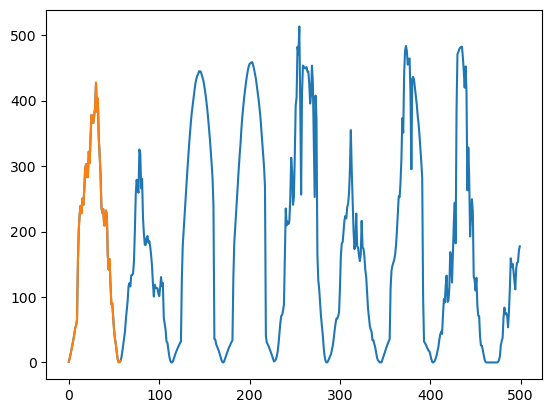

In [59]:
plt.plot(column3[column3 > 0][:500])
plt.plot(column3[column3 > 0][:58])
#Hauriem d'agafar cada muntanyeta

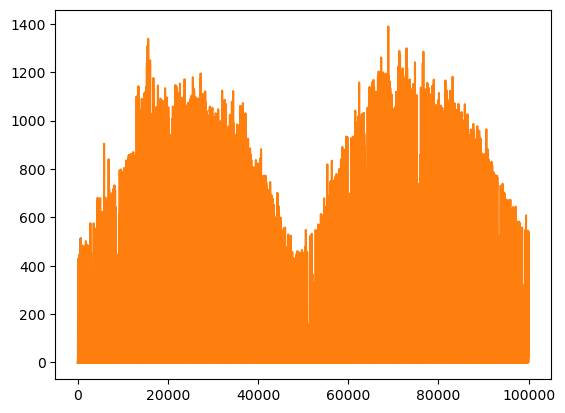

In [116]:
plt.plot(column3[:1000])
plt.plot(column3[:100000])

In [ ]:
def grab_daily_irradiation(array):
    daily_sum = 0
    output_array = np.array(366)
        
           

In [81]:
len(np.zeros(365))

365

In [82]:
np.zeros(365)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [157]:
df = pd.read_csv('PER10min2009_2022_RS_H.csv', 
                 parse_dates = ['TIMESTAMP'], 
                 index_col='TIMESTAMP')

sum_imps = df['RS_Avg'].sum() #sum the total of the money column
#sumimps_byday = df.groupby(['day'])[["RS_Avg"]].sum() #groups the sum of the money column by day

C:\Users\T.C\AppData\Local\Temp\ipykernel_7064\1641837503.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv',


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [113]:
sumeta1 = np.sum(df['RS_Avg'][:144]) # Molt petit?????????
sumeta2 = np.sum(df['RS_Avg'][144:289])
sumeta3 = np.sum(df['RS_Avg'][289:433])
sumeta5 = np.sum(df['RS_Avg'][600:730])
suma5 = sumeta5*600
suma2 = sumeta2*600
suma3 = sumeta3*600
print(suma2)
print(suma3)
print(suma5)

suma = sumeta*600 #600 segons en 10 minuts
suma

4438933.800000001
7849475.400000001
8427721.200000001


6515178.6

In [104]:
S0[0] - suma

17823810.630156778

In [105]:
suma/S0[0]

0.2676848466627154

In [109]:
suma2/S0[1]

0.18255309309377363

In [110]:
suma3/S0[2]

0.3230892180760641

In [114]:
suma5/S0[4]

0.3473816546538817

In [119]:
34560000/S0[300]  # No pot ser!!!!!!!!!!!!!!


1.2493670863613644